In [1]:
# import importlib
# import Diffusion

# importlib.reload(Diffusion)

In [2]:
# import matplotlib.pyplot as plt
# import torch

# from Diffusion import GaussianDiffusionSampler, GaussianDiffusionTrainer
# from Diffusion.Model import UNet
# from Scheduler import GradualWarmupScheduler

In [3]:
def visualize_image_tensor(image_tensor):
    if image_tensor.shape != (3, 32, 32):
        raise ValueError("Invalid shape")
    image_tensor = (image_tensor + 1) / 2.0
    image_array = image_tensor.numpy().transpose((1, 2, 0))
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

In [4]:
# modelConfig = {
#         "state": "eval",
#         "epoch": 200,
#         "batch_size": 1,
#         "T": 1000,
#         "channel": 128,
#         "channel_mult": [1, 2, 3, 4],
#         "attn": [2],
#         "num_res_blocks": 2,
#         "dropout": 0.15,
#         "lr": 1e-4,
#         "multiplier": 2.,
#         "beta_1": 1e-4,
#         "beta_T": 0.02,
#         "img_size": 32,
#         "grad_clip": 1.,
#         "device": "cuda:0", ### MAKE SURE YOU HAVE A GPU !!!
#         "training_load_weight": None,
#         "save_weight_dir": "./Checkpoints/",
#         "test_load_weight": "ckpt_199_.pt",
#         "sampled_dir": "./SampledImgs/",
#         "sampledNoisyImgName": "NoisyNoGuidenceImgs.png",
#         "sampledImgName": "SampledNoGuidenceImgs.png",
#         "nrow": 8
#         }

In [5]:
# with torch.no_grad():
#     device = torch.device(modelConfig["device"])
#     model = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
#                     num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)
#     ckpt = torch.load(os.path.join(
#         modelConfig["save_weight_dir"], modelConfig["test_load_weight"]), map_location=device)
#     model.load_state_dict(ckpt)
#     print("model load weight done.")
#     model.eval()
#     sampler = GaussianDiffusionSampler(
#         model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"]).to(device)
#     noisyImage = torch.randn(
#             size=[modelConfig["batch_size"], 3, 32, 32], device=device)
#     sampledImgs, x_hat_list, snr = sampler(noisyImage, get_x_hat_list=True)

In [6]:
# visualize_image_tensor(sampledImgs[0].cpu())

In [7]:
# for i in range(0, 1000, 100):
#     print("signal-to-noise ratio :", snr[i].cpu().numpy())
#     visualize_image_tensor(x_hat_list[0][i].cpu())

In [8]:
import matplotlib.pyplot as plt
import torch

from DiffusionFreeGuidence.DiffusionCondition import GaussianDiffusionSampler, GaussianDiffusionTrainer
from DiffusionFreeGuidence.ModelCondition import UNet
from Diffusion.Diffusion import GaussianDiffusionSampler as UnconGaussianDiffusionSampler, GaussianDiffusionTrainer as UnconGaussianDiffusionTrainer
from Diffusion.Model import UNet as UnconUNet
from Scheduler import GradualWarmupScheduler

/home/jovyan/conda/my-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
b_size = 5

In [10]:
modelConfig = {
    "state": "eval",
    "epoch": 1,
    "batch_size": b_size,
    "T": 500,
    "channel": 128,
    "channel_mult": [1, 2, 2, 2],
    "num_res_blocks": 2,
    "dropout": 0.15,
    "lr": 1e-4,
    "multiplier": 2.5,
    "beta_1": 1e-4,
    "beta_T": 0.028,
    "img_size": 32,
    "grad_clip": 1.,
    "device": "cuda:0",
    "w": 1.8,
    "save_dir": "./CheckpointsCondition/",
    "training_load_weight": None,
    "test_load_weight": "ckpt_63_.pt",
    "sampled_dir": "./SampledImgs/",
    "sampledNoisyImgName": "NoisyGuidenceImgs.png",
    "sampledImgName": "SampledGuidenceImgs.png",
    "nrow": 8
}

In [11]:
device = torch.device(modelConfig["device"])
# load model and evaluate
with torch.no_grad():
    model = UNet(T=modelConfig["T"], num_labels=10, ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"],
                    num_res_blocks=modelConfig["num_res_blocks"], dropout=modelConfig["dropout"]).to(device)
    ckpt = torch.load(os.path.join(
        modelConfig["save_dir"], modelConfig["test_load_weight"]), map_location=device)
    model.load_state_dict(ckpt)
    print("model load weight done.")
    model.eval()
    sampler = GaussianDiffusionSampler(
        model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"], w=modelConfig["w"]).to(device)
    # Sampled from standard normal distribution
    noisyImage = torch.randn(
        size=[modelConfig["batch_size"], 3, modelConfig["img_size"], modelConfig["img_size"]], device=device)
    sampledImgs, x_hat_tensor, x_t_tensor, snr, alphas_bar = sampler(noisyImage, torch.tensor([1]*modelConfig["batch_size"]).to(device), tracking_mode=True)

model load weight done.
tensor([499, 499, 499, 499, 499], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([498, 498, 498, 498, 498], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([497, 497, 497, 497, 497], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([496, 496, 496, 496, 496], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([495, 495, 495, 495, 495], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([494, 494, 494, 494, 494], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([493, 493, 493, 493, 493], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torch.int64
tensor([492, 492, 492, 492, 492], device='cuda:0')
x_t type : torch.float32
t type : torch.int64
labels type : torc

In [12]:
# for i in range(0, 500, 50):
#     print("signal-to-noise ratio :", snr[i].cpu().numpy())
#     print("noisy image :")
#     visualize_image_tensor(x_t_tensor[0][i].cpu())
#     print("estimation :")
#     visualize_image_tensor(x_hat_tensor[0][i].cpu())

In [13]:
sampledImgs_reshaped = sampledImgs[:, None, :, :, :]  # shape [batch_size, 1, 3, 32, 32]
alphas_bar_reshaped = alphas_bar[None, :, None, None, None]  # shape [1, 500, 1, 1, 1]
brownian_motion = (alphas_bar_reshaped / (1 - alphas_bar_reshaped)) * (x_t_tensor - torch.sqrt(alphas_bar_reshaped) * sampledImgs_reshaped)

In [14]:
modelConfig = {
        "state": "eval",
        "epoch": 200,
        "batch_size": b_size,
        "T": 1000,
        "channel": 128,
        "channel_mult": [1, 2, 3, 4],
        "attn": [2],
        "num_res_blocks": 2,
        "dropout": 0.15,
        "lr": 1e-4,
        "multiplier": 2.,
        "beta_1": 1e-4,
        "beta_T": 0.02,
        "img_size": 32,
        "grad_clip": 1.,
        "device": "cuda:0", ### MAKE SURE YOU HAVE A GPU !!!
        "training_load_weight": None,
        "save_weight_dir": "./Checkpoints/",
        "test_load_weight": "ckpt_199_.pt",
        "sampled_dir": "./SampledImgs/",
        "sampledNoisyImgName": "NoisyNoGuidenceImgs.png",
        "sampledImgName": "SampledNoGuidenceImgs.png",
        "nrow": 8
        }

In [15]:
with torch.no_grad():
    device = torch.device(modelConfig["device"])
    model = UnconUNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                    num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)
    ckpt = torch.load(os.path.join(
        modelConfig["save_weight_dir"], modelConfig["test_load_weight"]), map_location=device)
    model.load_state_dict(ckpt)
    print("model load weight done.")
    model.eval()
    model.to(device)

    t_tensor = torch.arange(499, -1, -1).unsqueeze(0).repeat(x_t_tensor.shape[0], 1).to(device)
    flattened_x_t = x_t_tensor.reshape(-1, 3, 32, 32)
    flattened_t = t_tensor.reshape(-1)

    eps_hat = model(flattened_x_t, flattened_t)
    eps_hat = eps_hat.reshape(x_t_tensor.shape)

    alphas_bar_reshaped = alphas_bar.unsqueeze(0).unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
    x_hat_unconditional = 1 / torch.sqrt(alphas_bar_reshaped) * (x_t_tensor - torch.sqrt(1 - alphas_bar_reshaped) * eps_hat)


model load weight done.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


signal-to-noise ratio : 99.99000126323257
noisy image :


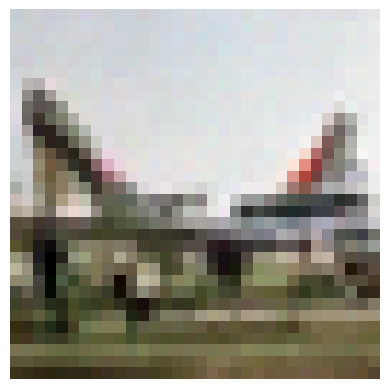

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


conditional estimation :


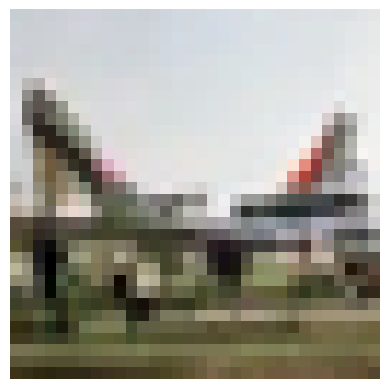

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Unconditional estimation :


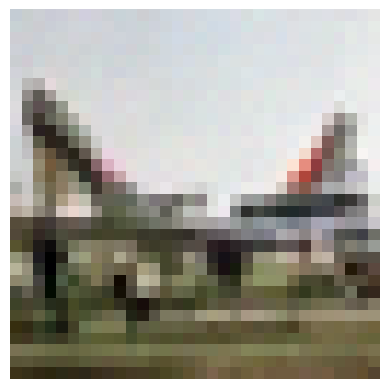

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


signal-to-noise ratio : 3.414432155646283
noisy image :


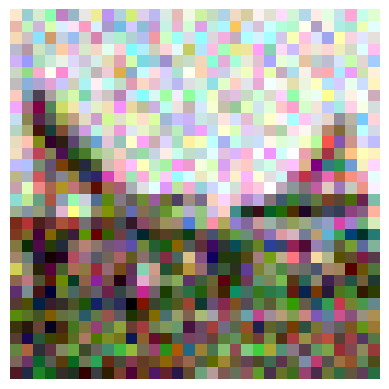

conditional estimation :


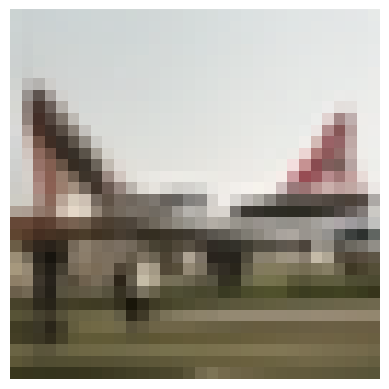

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Unconditional estimation :


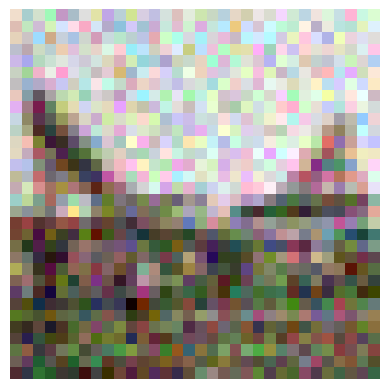

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


signal-to-noise ratio : 1.4802629082022223
noisy image :


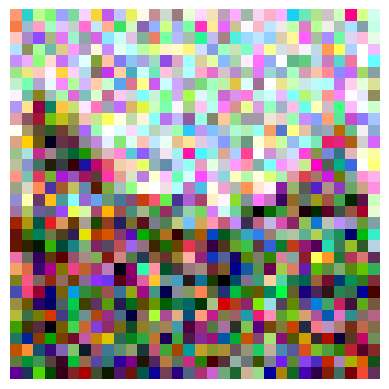

conditional estimation :


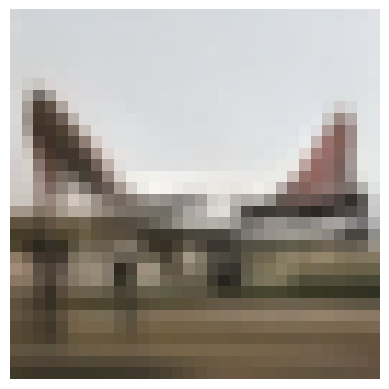

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


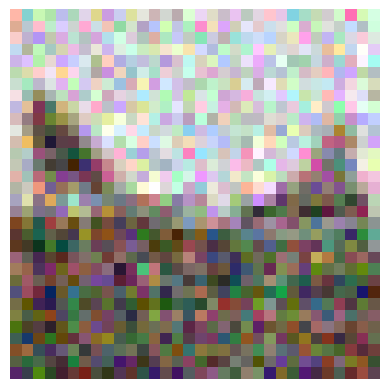

signal-to-noise ratio : 0.7549446025608593
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


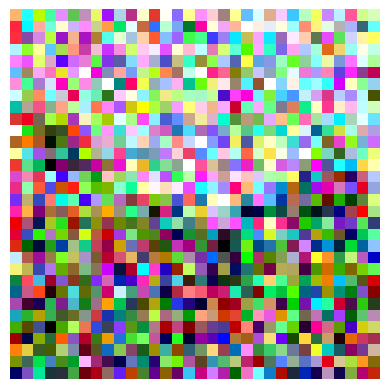

conditional estimation :


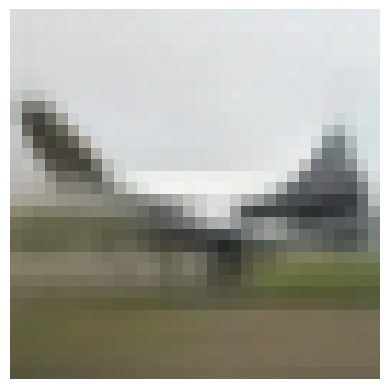

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


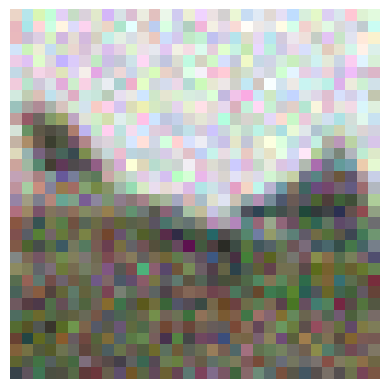

signal-to-noise ratio : 0.3838519476924821
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


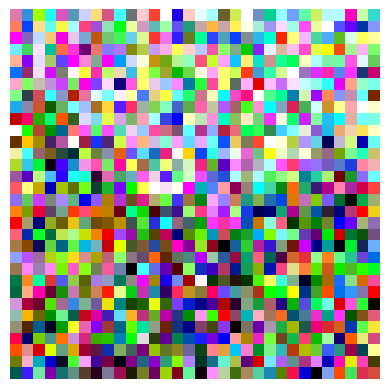

conditional estimation :


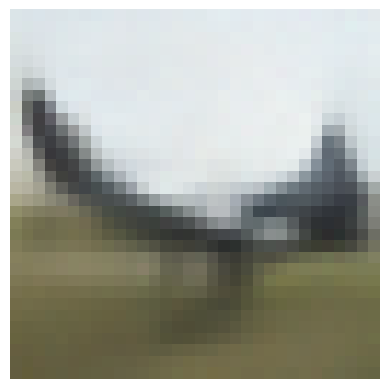

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


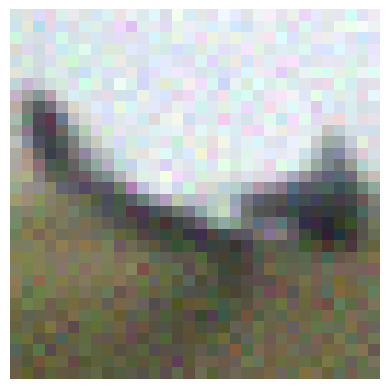

signal-to-noise ratio : 0.18337942476251612
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


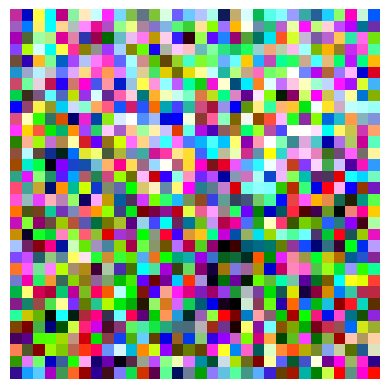

conditional estimation :


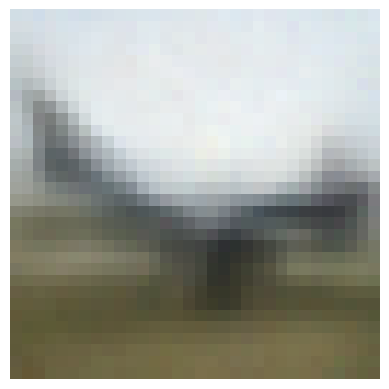

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


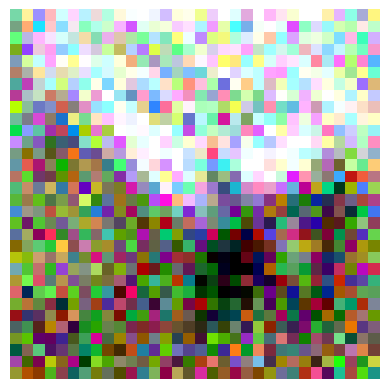

signal-to-noise ratio : 0.0797241899898592
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


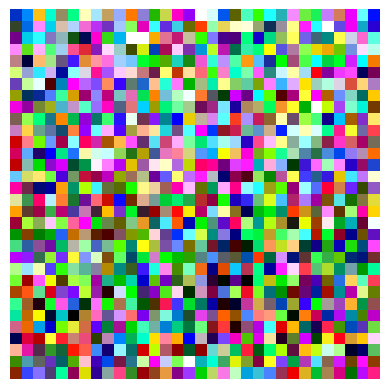

conditional estimation :


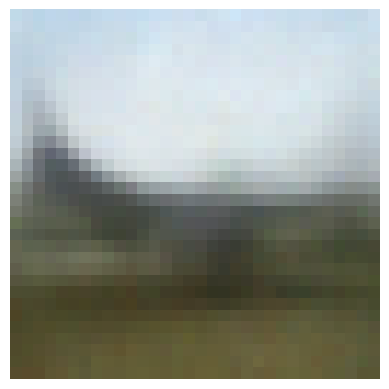

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


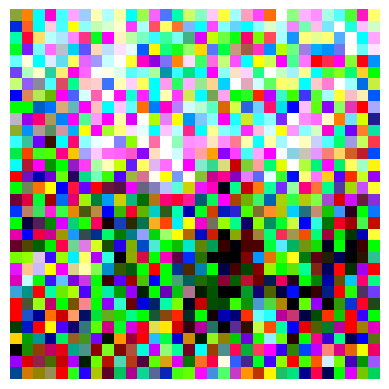

signal-to-noise ratio : 0.03089867336245362
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


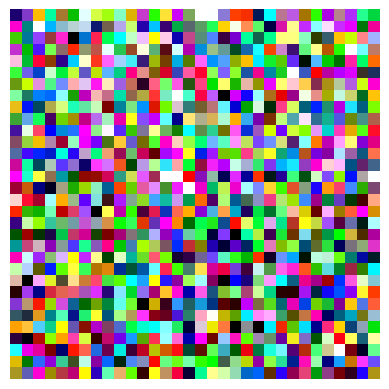

conditional estimation :


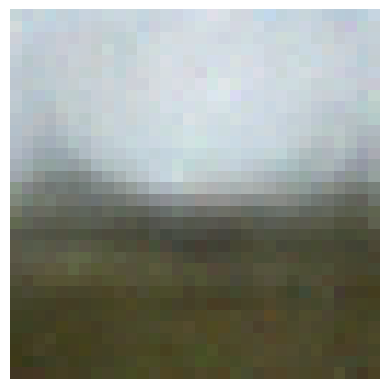

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


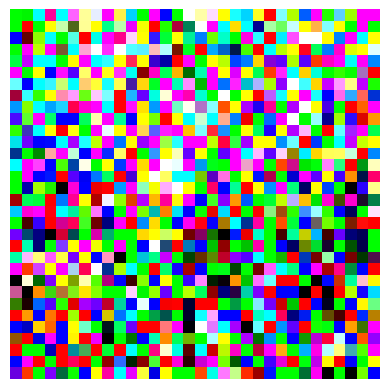

signal-to-noise ratio : 0.010532708684184572
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


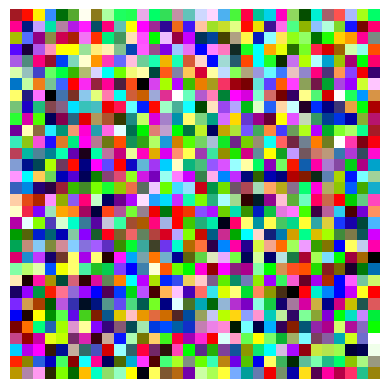

conditional estimation :


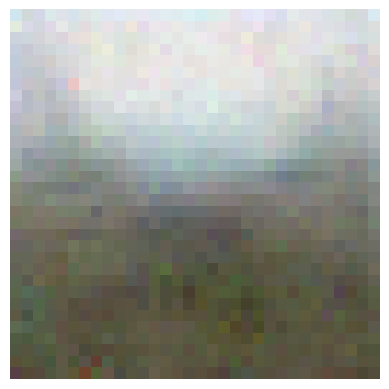

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


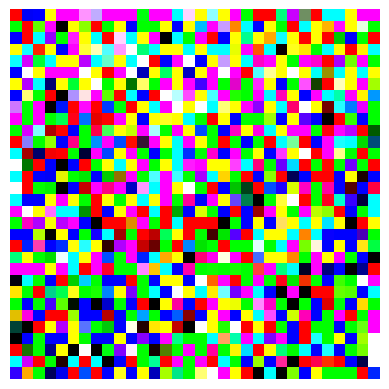

signal-to-noise ratio : 0.0031322257966608577
noisy image :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


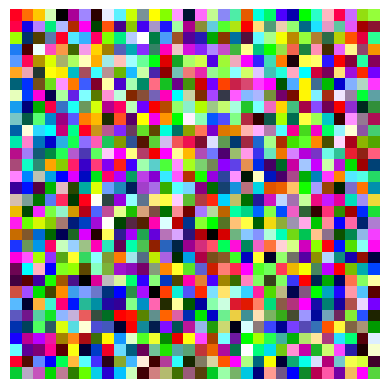

conditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


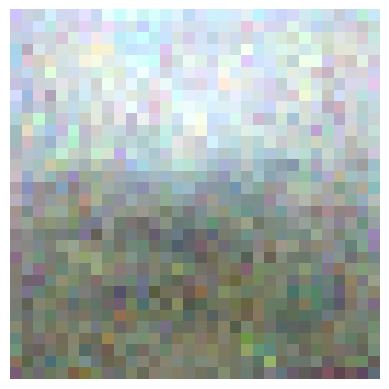

Unconditional estimation :


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


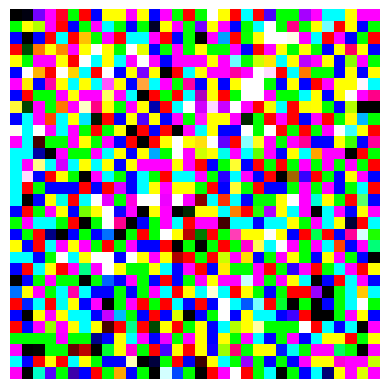

In [16]:
for i in range(0, 500, 50):
    print("signal-to-noise ratio :", snr[i].cpu().numpy())
    print("noisy image :")
    visualize_image_tensor(x_t_tensor[0][i].cpu())
    print("conditional estimation :")
    visualize_image_tensor(x_hat_tensor[0][i].cpu())
    print("Unconditional estimation :")
    visualize_image_tensor(x_hat_unconditional[0][i].cpu())

In [17]:
# Reshape sampledImg for broadcasting
sampledImg_reshaped = sampledImgs[:, None, :, :, :]

# Compute the squared L2 norms
diff_unconditional = sampledImg_reshaped - x_hat_unconditional
diff_tensor = sampledImg_reshaped - x_hat_tensor

squared_l2_unconditional = (diff_unconditional ** 2).sum(dim=(2, 3, 4))
squared_l2_tensor = (diff_tensor ** 2).sum(dim=(2, 3, 4))

# Compute the differences
difference = squared_l2_unconditional - squared_l2_tensor

# Compute the SNR differences; note the inversion for decreasing snr
snr_diff = snr[:-1] - snr[1:]

# Perform the Riemann sum
integral_approximation = torch.sum(difference[:, 1:] * snr_diff, dim=1)


In [18]:
print(integral_approximation)

tensor([6525.3174, 6860.7551, 6595.5378, 6530.8889, 6628.9823],
       device='cuda:0', dtype=torch.float64)


In [19]:
# snr_reshaped = snr[None, :, None, None, None]

# 1. Calculate the increments in Brownian motion
delta_Brownian_motion = brownian_motion[:, 1:, :, :, :] - brownian_motion[:, :-1, :, :, :]

# 2. Compute the term x_hat_tensor - x_hat_unconditional
difference = x_hat_tensor[:, 1:, :, :, :] - x_hat_unconditional[:, 1:, :, :, :]

# 3. Multiply these together
term_inside_summation = difference * delta_Brownian_motion

# 4. Sum these up over all time steps
ito_integral_approx = term_inside_summation.sum(dim=(1, 2, 3, 4))


In [20]:
print(x_hat_tensor)

tensor([[[[[ 5.5607e-01,  5.7376e-01,  5.9723e-01,  ...,  7.4735e-01,
             7.6533e-01,  7.9267e-01],
           [ 5.8658e-01,  5.8572e-01,  5.9551e-01,  ...,  7.8044e-01,
             7.8215e-01,  8.1137e-01],
           [ 6.0726e-01,  6.0067e-01,  6.0011e-01,  ...,  7.8419e-01,
             7.8805e-01,  8.1114e-01],
           ...,
           [-5.0790e-02, -7.8069e-02, -1.0972e-01,  ..., -1.2129e-01,
            -7.7209e-02, -3.9788e-02],
           [-2.8844e-01, -2.8340e-01, -3.2926e-01,  ..., -2.1523e-01,
            -2.3078e-01, -1.5149e-01],
           [-5.3510e-01, -5.7070e-01, -6.2056e-01,  ..., -2.0842e-01,
            -2.3085e-01, -3.3339e-01]],

          [[ 6.0971e-01,  6.1129e-01,  6.2177e-01,  ...,  7.6713e-01,
             7.8261e-01,  8.0506e-01],
           [ 6.3264e-01,  6.2035e-01,  6.1858e-01,  ...,  8.0982e-01,
             8.0715e-01,  8.3361e-01],
           [ 6.2829e-01,  6.2355e-01,  6.2956e-01,  ...,  8.1625e-01,
             8.1345e-01,  8.3048e-01],
 

In [21]:
est = 0.5*integral_approximation + ito_integral_approx

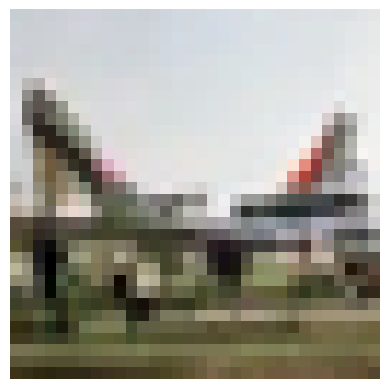

log p(x|y)/p(x) = 3482.336395249987


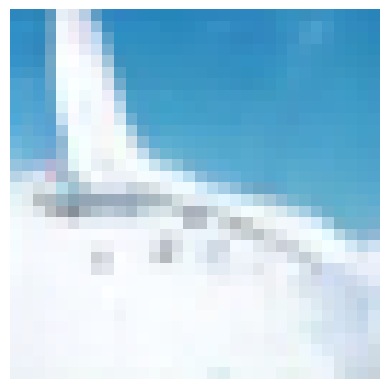

log p(x|y)/p(x) = 3714.070848549448


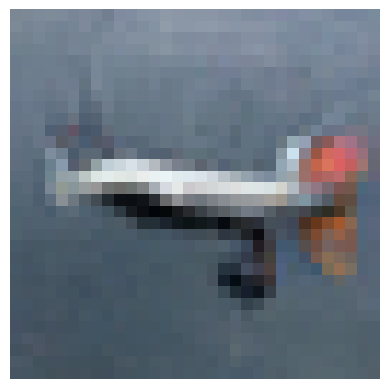

log p(x|y)/p(x) = 3262.085864147986


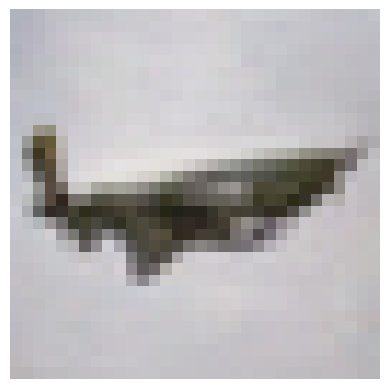

log p(x|y)/p(x) = 3391.908742718795


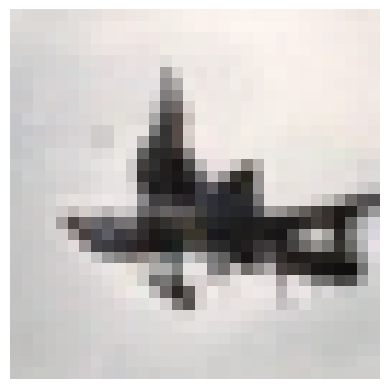

log p(x|y)/p(x) = 3277.246808254231


In [22]:
for i in range(len(est)):
    visualize_image_tensor(sampledImgs[i].cpu())
    print("log p(x|y)/p(x) =", est[i].cpu().numpy())

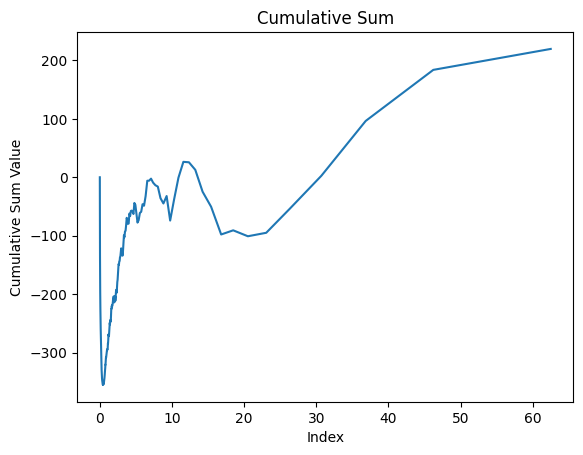

In [23]:
cumulative_sum =torch.cumsum(torch.flip(term_inside_summation[0].sum(dim=(1, 2, 3)), [0]), dim=0).cpu()
plt.figure()
plt.plot(torch.flip(snr[1:], [0]).cpu(), cumulative_sum.numpy())
plt.title('Cumulative Sum')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum Value')
plt.show()

In [24]:
print(delta_Brownian_motion[0][0].cpu())

tensor([[[ 1.3067e+02, -6.2024e+00, -1.3942e+02,  ..., -1.6741e+01,
           3.4250e+00,  2.9858e+01],
         [ 1.2519e+02,  2.7213e+01, -1.3755e+02,  ..., -1.3491e+02,
           4.0316e+01, -1.0232e+02],
         [-4.9550e+01, -2.3687e+02,  1.2509e+02,  ..., -1.1942e+02,
          -4.7358e+01, -1.7625e+01],
         ...,
         [-4.9044e+01,  1.2267e+02,  1.2594e-01,  ...,  8.3698e+01,
          -2.7321e+01, -7.7342e+01],
         [ 9.9987e+01, -2.9057e+01, -8.9860e+01,  ...,  2.8982e+00,
           7.5311e+01,  9.7967e+01],
         [-7.3596e+01, -3.6780e+01, -4.0766e+01,  ...,  4.8342e+00,
          -4.8524e+01, -7.3150e+01]],

        [[-1.1916e+02, -1.0631e+02, -2.3149e+02,  ...,  3.8693e+01,
           2.3240e+01, -1.4065e+01],
         [-1.3325e+02, -6.5044e+01,  5.4301e+01,  ..., -4.2280e+01,
           2.7823e+01, -1.3391e+02],
         [ 4.8953e+01, -7.6929e+01,  3.1459e+01,  ..., -4.9272e+01,
           7.4224e+01,  1.3621e+01],
         ...,
         [ 4.9037e+00, -1

In [25]:
import importlib
import Utils

importlib.reload(Utils)
from Utils import get_pointwise_mutual_info, get_pointwise_mutual_info_2

In [26]:
est1, est2 = get_pointwise_mutual_info(sampledImgs[0], 1)

/home/jovyan/DenoisingDiffusionProbabilityModel-ddpm-/Utils.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gamma_list = torch.tensor(gamma_list).to(x.device)


In [27]:
print(est1, est2)

tensor(71.1961, device='cuda:0', dtype=torch.float64) tensor(74.2570, device='cuda:0', dtype=torch.float64)


In [39]:
est1, est2 = get_pointwise_mutual_info_2(sampledImgs[0], 1)
print(est1, est2)

tensor(61.1757, device='cuda:0', dtype=torch.float64) tensor(71.2581, device='cuda:0', dtype=torch.float64)


In [29]:
print(est1, est2)

tensor(71.3520, device='cuda:0', dtype=torch.float64) tensor(69.4432, device='cuda:0', dtype=torch.float64)


In [30]:
t = torch.arange(499, -1, -1).to(device)
betas = torch.linspace(1e-4, 0.028, 500).double()
alphas = 1. - betas
alphas_bar = torch.flip(torch.cumprod(alphas, dim=0), [0]).to(device)
snr = (alphas_bar / torch.sqrt(1. - alphas_bar))

ValueError: x and y must have same first dimension, but have shapes (500,) and (5, 500)

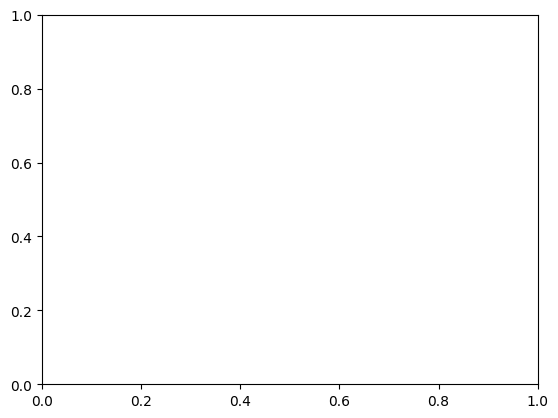

In [31]:
plt.plot(snr.cpu().numpy(), squared_l2_unconditional.cpu().numpy(), label="unconditional")
plt.plot(snr.cpu().numpy(), squared_l2_conditional.cpu().numpy(), label="conditional")
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1000)
plt.show()

In [ ]:
snr_diff = snr[1:] - snr[:-1]